<a href="https://colab.research.google.com/github/sujalkyal/google-colab-saves/blob/practice/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("/content/train.csv")

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df.shape

(20800, 5)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(18285, 5)

In [12]:
df=df.reset_index()

In [13]:
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
y=df['label']

In [19]:
X=df.drop('label',axis=1)

In [20]:
X.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [21]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.15.0'

In [26]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [27]:
voc_size=5000

In [28]:
messages=X.copy()

In [29]:
messages.head(5)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [30]:
import nltk
import re
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [37]:
#data preprocessing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(0,len(messages)):
  review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
  review=review.lower()
  review=review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [38]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [39]:
# one hot encoding
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[3072, 4045, 2960, 4579, 3595, 4437, 1, 327, 4967, 494],
 [1383, 4334, 2167, 2753, 4771, 1514, 425],
 [1557, 2971, 605, 2479],
 [811, 2923, 3443, 114, 2309, 2481],
 [309, 4771, 3483, 2362, 33, 1167, 4771, 2854, 1433, 3513],
 [2024,
  1289,
  1536,
  4139,
  3140,
  4850,
  3926,
  3982,
  3025,
  56,
  2080,
  3449,
  4534,
  1121,
  425],
 [701, 3534, 1635, 3751, 522, 660, 3181, 4110, 2106, 3002, 3595],
 [2474, 3025, 673, 505, 4085, 4836, 4850, 4318, 2106, 3002, 3595],
 [3159, 3060, 1744, 1411, 3351, 4531, 3333, 1706, 4850, 4607],
 [4799, 436, 3812, 3301, 1227, 827, 2716, 1539],
 [2242, 4930, 2865, 521, 3625, 3778, 3389, 1198, 3645, 1870, 2541],
 [114, 4896, 3595, 4998, 4850, 4085],
 [1965, 1780, 2261, 3422, 2142, 659, 3025, 1738, 4655],
 [4690, 1828, 353, 1173, 4908, 1903, 2622, 2106, 3002, 3595],
 [2246, 833, 3481, 3232, 2380, 2106, 3002, 3595],
 [3453, 3431, 1930, 2132, 4017, 498, 4303, 4529, 3898, 3101],
 [3673, 4276, 4334],
 [1738, 2104, 2406, 3978, 4850, 1168, 2553, 425],
 [330

In [40]:
#embedding representation
sent_len=20
embedded_docs=pad_sequences(onehot_repr,maxlen=sent_len,padding='pre')
embedded_docs

array([[   0,    0,    0, ...,  327, 4967,  494],
       [   0,    0,    0, ..., 4771, 1514,  425],
       [   0,    0,    0, ..., 2971,  605, 2479],
       ...,
       [   0,    0,    0, ..., 2106, 3002, 3595],
       [   0,    0,    0, ..., 3885, 3036, 4103],
       [   0,    0,    0, ..., 2202, 4282, 1264]], dtype=int32)

In [43]:
#creating model
from tensorflow.keras.layers import Dropout
embedding_vector_features=40  ## features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_3 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
len(embedded_docs),y.shape

(18285, (18285,))

In [45]:
import numpy as np
X_data=np.array(embedded_docs)
y_data=np.array(y)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=42)

In [50]:
X_train.shape,y_train.shape

((12799, 20), (12799,))

In [51]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 19s 65ms/step - loss: 0.3320 - accuracy: 0.8435 - val_loss: 0.2303 - val_accuracy: 0.9058
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.1480 - accuracy: 0.9433 - val_loss: 0.2058 - val_accuracy: 0.9143
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1062 - accuracy: 0.9600 - val_loss: 0.2171 - val_accuracy: 0.9092
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0783 - accuracy: 0.9731 - val_loss: 0.2709 - val_accuracy: 0.9107
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0560 - accuracy: 0.9802 - val_loss: 0.3274 - val_accuracy: 0.9129
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0425 - accuracy: 0.9848 - val_loss: 0.3166 - val_accuracy: 0.9045
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.3753 - val_accuracy: 0.9136


# Performance metrices and Accuracy

In [85]:
y_pred=model.predict(X_test)

172/172 [==============================] - 1s 3ms/step


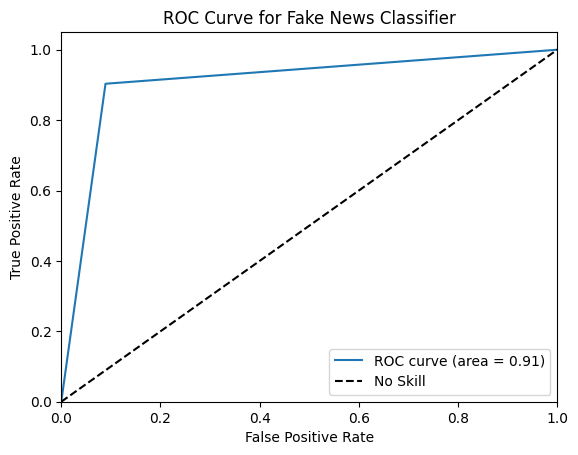

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake News Classifier')
plt.legend()
plt.show()

In [86]:
y_pred=np.where(y_pred>0.5,1,0) # since solving for fake news classifier , minimizing false positive is important

In [55]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_test,y_pred)

array([[2830,  277],
       [ 230, 2149]])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9075829383886256

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3107
           1       0.89      0.90      0.89      2379

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486

